In [2]:
import pandas as pd


# calculate varations

In [1]:
def add_variation_column(df, column_name):
    variations = [None]  # Initialize the list of variations with None for the first row
    for i in range(1, len(df)):
        diff = df[column_name].iloc[i] - df[column_name].iloc[i-1]
        variations.append(diff)
    df[f'variation_{column_name}'] = variations
    return df

# read the data from  data_kick.xlsx forme folder machine learning algorithem test
or use the file from dataset folder the varaiation is calculated

In [123]:
df=pd.read_excel(r'C:\Users\hp\Desktop\M2\PFE\Code\code pfe\dataset\26.xlsx')


In [145]:
df.columns

Index(['index', 'CHKP (kPa)', 'SPM1 (1/s)', 'SKNO', 'SPM2 (1/s)', 'SPM3 (1/s)',
       'SQID', 'TVA (m3)', 'DATE', 'TIME', 'MFOP ((m3/s)/(m3/s))', 'ACTC',
       'MFOA (m3/s)', 'DBTM (m)', 'DBTV (m)', 'MFIA (m3/s)', 'DMEA (m)',
       'MDIA (kg/m3)', 'DVER (m)', 'MTOA (degC)', 'BPOS (m)', 'MTIA (degC)',
       'ROPA (m/h)', 'MCOA (S/m)', 'HKLA (N)', 'MCIA (S/m)', 'HKLX (N)',
       'STKC', 'WOBA (N)', 'WOBX (N)', 'DRTM (m)', 'TQA (N.m)', 'TQX (N.m)',
       'GASA (mol/mol)', 'RPMA (rad/s)', 'SPPA (kPa)', 'RIG_STATE',
       'MDOA (kg/m3)', 'ROPI (m/s)', 'Unnamed: 39', 'STATUS', 'Unnamed: 41'],
      dtype='object')

In [124]:
cols=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)']


In [125]:
data=df[cols].copy()


In [126]:
for column_name in cols:
    data=add_variation_column(data, column_name)

In [127]:
data=data.dropna()

In [128]:
df.shape

(16374, 45)

In [129]:
data['STATUS']=df['STATUS'][1:]

In [152]:
data.head()

,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),variation_TVA (m3),variation_SPPA (kPa),variation_MFOP ((m3/s)/(m3/s)),variation_GASA (mol/mol),STATUS
1,39.2,68.947573,0.05,0.0,0.0,-13.789515,0.0,0.0,0
2,39.2,68.947573,0.05,0.0,0.0,0.000000,0.0,0.0,0
3,39.1,68.947573,0.05,0.0,-0.1,0.000000,0.0,0.0,0
4,39.2,68.947573,0.05,0.0,0.1,0.000000,0.0,0.0,0
5,39.2,75.842330,0.05,0.0,0.0,6.894757,0.0,0.0,0


In [130]:
data[data['STATUS']==1].index

Int64Index([3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963,
            ...
            4362, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371],
           dtype='int64', length=418)

In [154]:
data.columns

Index(['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))', 'GASA (mol/mol)',
       'variation_TVA (m3)', 'variation_SPPA (kPa)',
       'variation_MFOP ((m3/s)/(m3/s))', 'variation_GASA (mol/mol)', 'STATUS'],
      dtype='object')

# rename the columns for column name issus

In [131]:
data = data.rename(columns={'variation_GASA (mol/mol)': 'variation_GASA'})
data = data.rename(columns={'variation_SPPA (kPa)':'variation_SPPA'})
data = data.rename(columns={'variation_MFOP ((m3/s)/(m3/s))': 'variation_MFOP'})
data = data.rename(columns={'variation_TVA (m3)': 'variation_TVA'})


In [132]:
cols=['TVA (m3)', 'SPPA (kPa)', 'MFOP ((m3/s)/(m3/s))',
       'GASA (mol/mol)','STATUS']


<Axes: >

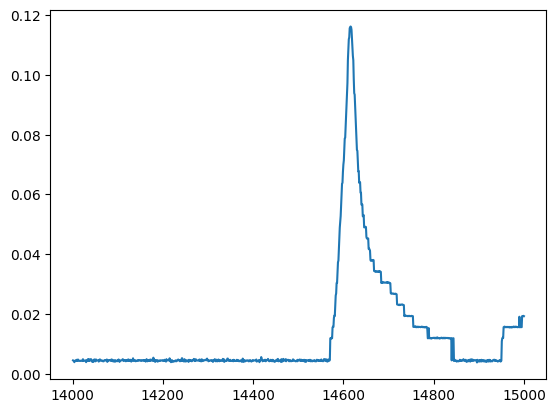

In [115]:
data['GASA (mol/mol)'][14000:15000].plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

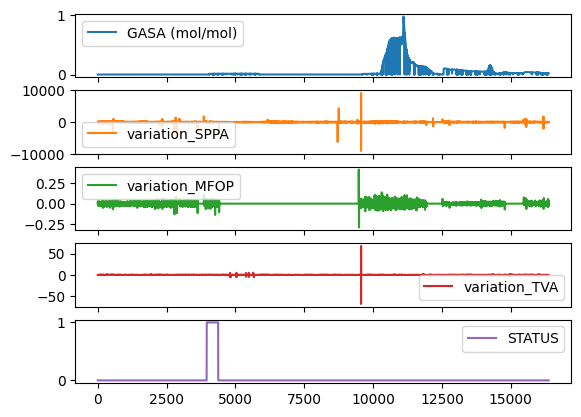

In [133]:
cols1=['GASA (mol/mol)','variation_SPPA','variation_MFOP','variation_TVA','STATUS']
data[cols1].plot(subplots=True)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

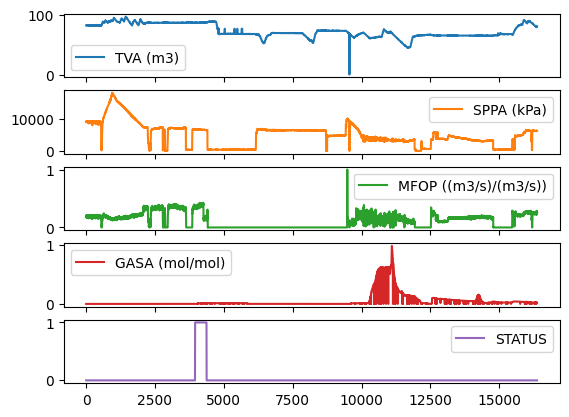

In [134]:
data[cols].plot(subplots=True
                )



In [71]:
data['TVA (m3)'][14000:14500].plot()

68.3404

# this the function we deal with

In [116]:
def feature_rep(window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop, p):
    # threshold for each feature mean of the feature when the kick is happen
    gasa = window['GASA (mol/mol)'].mean()
    tva = window['variation_TVA'].mean()
    spp = window['variation_SPPA'].mean()
    mfop = window['variation_MFOP'].mean()
#gasa pas de variasion 
    detect_gasa,detect_spp,detect_tva,detect_mfop=False,False,False,False
    l=[]
    if gasa > 0.035  and mfop < thrsh_mfop and spp < thrsh_spp :
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]

        return 1,l
    elif : 

    else:
        
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]
        return 0,l
    

In [15]:
def feature_rep_mean(window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop, p):
    # threshold for each feature mean of the feature when the kick is happen
    gasa = window['variation_GASA'].mean()
    tva = window['variation_TVA'].mean()
    spp = window['variation_SPPA'].mean()
    mfop = window['variation_MFOP'].mean()
#gasa pas de variasion 
    detect_gasa,detect_spp,detect_tva,detect_mfop=False,False,False,False
    l=[]
    if (gasa > thrsh_gasa or tva > thrsh_tva and mfop < thrsh_mfop) and (gasa >thrsh_gasa and spp < thrsh_spp and mfop < thrsh_mfop):
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]

        return 1,l
    
    elif (gasa > thrsh_gasa or tva > thrsh_tva and mfop < thrsh_mfop) and (gasa >thrsh_gasa and spp < thrsh_spp and mfop < thrsh_mfop):
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]
        print('cod2')
        return 1,l

    # elif (gasa > thrsh_gasa or tva > thrsh_tva and mfop < thrsh_mfop) and (gasa >thrsh_gasa or spp < thrsh_spp and mfop < thrsh_mfop):
    #     print('codnd3')
    #     return 0,l
    elif gasa>=thrsh_gasa and tva > thrsh_tva and mfop<=thrsh_mfop:
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]
        return 1,l
    elif  tva>=thrsh_tva and gasa > thrsh_gasa and mfop<=thrsh_mfop:
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]
       
        return 1,l

    else:
        
        l=[int(gasa > thrsh_gasa), int(tva > thrsh_tva),int( mfop < thrsh_mfop),int(spp < thrsh_spp)]
        return 0,l
    

In [23]:
data['kick_recognition']=111

In [124]:
data.reset_index()

,index,TVA (m3),SPPA (kPa),MFOP ((m3/s)/(m3/s)),GASA (mol/mol),variation_TVA,variation_SPPA,variation_MFOP,variation_GASA,STATUS,kick_recognition
0,2,39.200000,68.947573,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,3,39.100000,68.947573,0.050000,0.000000,-0.100000,0.000000,0.000000,0.000000,0,0
2,4,39.200000,68.947573,0.050000,0.000000,0.100000,0.000000,0.000000,0.000000,0,0
3,5,39.200000,75.842330,0.050000,0.000000,0.000000,6.894757,0.000000,0.000000,0,0
4,6,39.100000,62.052816,0.050000,0.000000,-0.100000,-13.789515,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
53236,53238,50.143081,7907.962477,0.145149,0.395015,0.044735,-47.495997,-0.047475,0.395015,1,0
53237,53239,50.315857,8004.701971,0.144811,0.395015,0.172777,96.739494,-0.000338,0.000000,1,0
53238,53240,50.174178,7997.999971,0.145684,0.000000,-0.141679,-6.702000,0.000873,-0.395015,1,0
53239,53241,50.164614,7922.566476,0.173816,0.396504,-0.009564,-75.433495,0.028132,0.396504,1,0


In [117]:
thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop =1, 0, 0.1, 0#accuracy:  0.9259172154280338 accuracy status 0.3121951219512195
# thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop = 0.00843, 0.4, 11,-0.00023


window_size = 180
window_size = window_size//5
positive=0
train_data=[]
d=[]
for i in range(len(data)-window_size+1):
    p=False
    window = data.iloc[i:i+window_size]
    
    data['kick_recognition'][i:i+window_size+1],b = feature_rep(
        window, thrsh_tva, thrsh_gasa, thrsh_spp, thrsh_mfop, p)
    
    b.append(data.iloc[i,-1:][0]) #append df[kick_recognitin][i]
    train_data.append(b)
        
    # if window['kick_recognition'].sum()>0 and window['STATUS'].sum()>0:
    #     positive+=1

C:\Users\hp\AppData\Local\Temp\ipykernel_6264\997342278.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kick_recognition'][i:i+window_size+1],b = feature_rep(


# calculate the accuracy

In [119]:

ACC = sum((data['STATUS'] == data['kick_recognition'])) / \
    data.shape[0]  # calculate accuracy of algorithm
data_kik = data[data['STATUS'] == 1]  # for get just where status=1
statu_acc = sum((data_kik['STATUS'] == data_kik['kick_recognition']))/data_kik.shape[0]
print('accuracy: ', ACC, 'accuracy status', statu_acc)

accuracy:  0.9977429249377857 accuracy status 0.6513761467889908


In [17]:
print(positive/(len(data)-window_size+1))

0.0


In [105]:
cols=['GASA (mol/mol)','TVA (m3)','MFOP ((m3/s)/(m3/s))', 'SPPA (kPa)' ,
       'STATUS']

# convert train data for plot issus

In [120]:
cols=['GASA (mol/mol)','TVA (m3)','MFOP ((m3/s)/(m3/s))', 'SPPA (kPa)' ,
       'STATUS']
dftest = pd.DataFrame(train_data, columns=cols)
dftest['test']=data['STATUS']

In [121]:
dftest['STATUS'].value_counts()

0.0    17172
1.0       72
Name: STATUS, dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

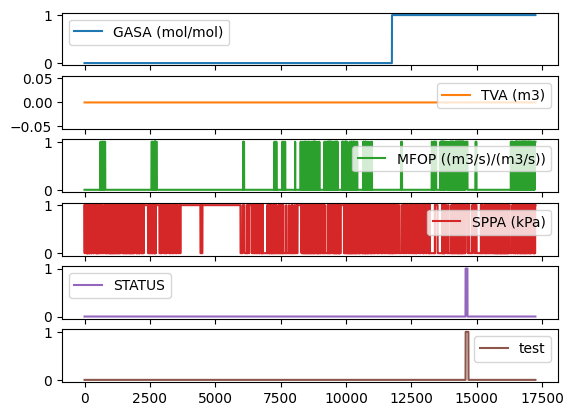

In [122]:
dftest.plot(subplots=True)

In [169]:
df.shape

(17244, 5)

array([0., 1.])

In [43]:
dftes=dftest
dftes.shape

(17244, 6)

In [44]:
dftes=dftes.drop_duplicates()

In [45]:
dftes.shape

(28, 6)

In [85]:
data[data['kick_recognition']==1].index

Int64Index([  610,   611,   612,   613,   666,   667,   668,   669,   670,
              671,
            ...
            53152, 53153, 53154, 53164, 53168, 53169, 53170, 53171, 53196,
            53197],
           dtype='int64', length=7131)

array([<Axes: >, <Axes: >], dtype=object)

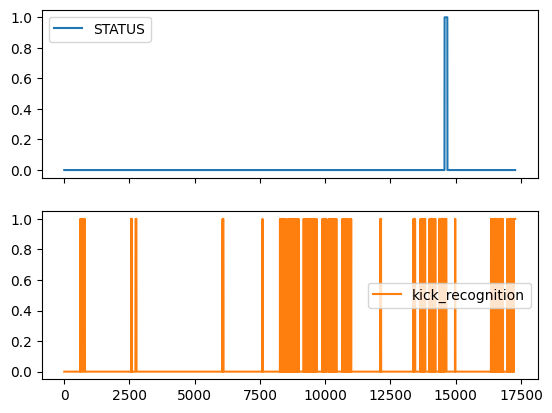

In [168]:
data[['STATUS','kick_recognition']].plot(subplots=True)